In [36]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib
import sys
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
sys.path.append('../code')

from diusst_eulera import diusst_eulera
from diusst_eulerb import diusst_eulerb
from diusst_eulerc import diusst_eulerc
from diusst_euler4S import diusst_eulerd

from simu_eulera import simulate_eulera
from simu_eulerb import simulate_eulerb
from simu_eulerc import simulate_eulerc
from simu_eulerd import simulate_eulerd


from mscfunctions import *
from interpolation import *

In [98]:
Cp = [1e-4,0.002,2.5,0.8,2]
Dp = [1e-4,0.002,2.5,0.8,2]
C = simulate_eulerc(Cp,windcos=1,windstrength=1)
D = simulate_eulerd(Dp,windcos=1,windstrength=1,strat=1,stratdepth=1,simlength=2)

Done, took  0.5411417484283447
Done, took  0.9397923946380615


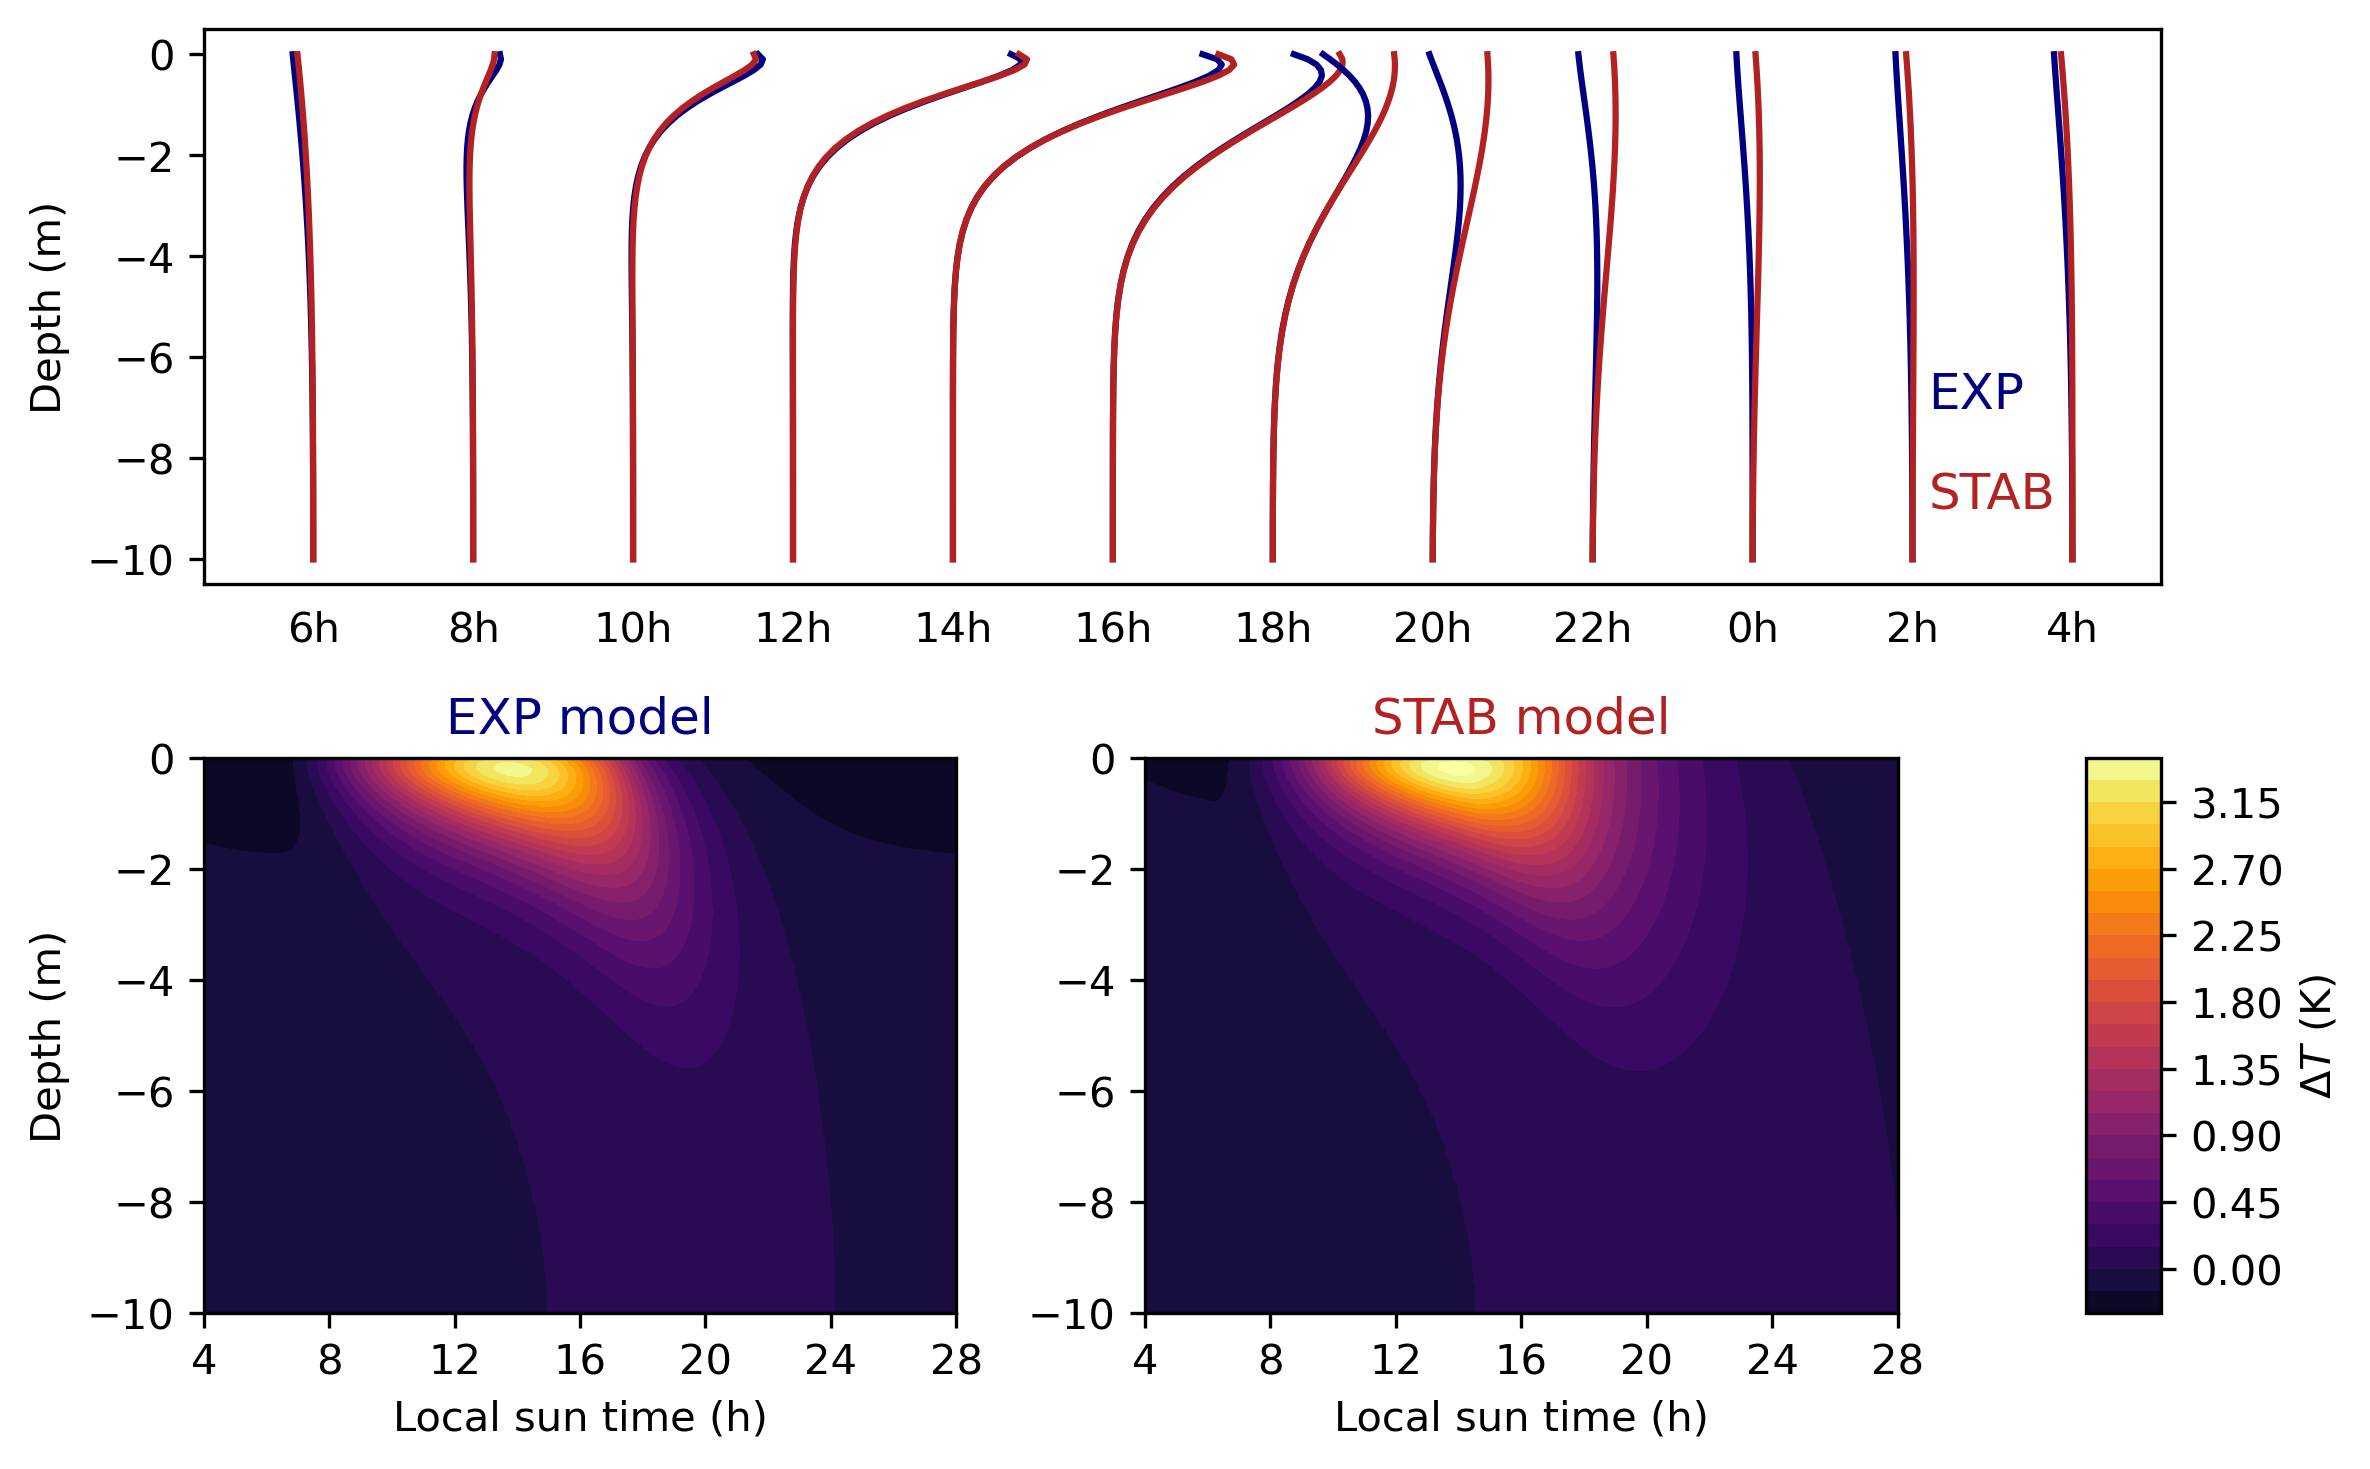

In [100]:
fig = plt.figure(tight_layout=True,figsize=(8,5),dpi=300)
gs = gridspec.GridSpec(2, 3,width_ratios=[1,1,0.1])

ax = fig.add_subplot(gs[0, :])
for i in range(3,15):
    hour = np.where(C[2]/86400*24>i*2)[0][0]
    ax.plot(C[0][hour]+2*i-300,C[1],c='navy')
    if i%1 == 0:
        ax.text(2*i,-11,str(2*i%24)+'h',ha='center',va='top')
        
    hour = np.where(D[2]/86400*24>i*2)[0][0]
    ax.plot(D[0][hour]+2*i-300,D[1],c='firebrick')
    ax.set(xticks=[])
ax.set(ylabel='Depth (m)')

ax1,ax2,ax3 = fig.add_subplot(gs[1, 0]), fig.add_subplot(gs[1, 1]), fig.add_subplot(gs[1, 2])
plot1=ax1.contourf(C[2]/86400*24,C[1],C[0].transpose()-300,levels=30,vmin=-0.5,vmax=3.5,cmap='inferno')
ax2.contourf(D[2]/86400*24,D[1],D[0].transpose()-300,levels=30,vmin=-0.5,vmax=3.5,cmap='inferno')

ax1.set(xlim=(4,28),xticks=np.arange(4,28+4,4),xlabel='Local sun time (h)')
ax2.set(xlim=(4,28),xticks=np.arange(4,28+4,4),xlabel='Local sun time (h)')
ax1.set(ylabel=('Depth (m)'))
ax1.set_title('EXP model',c='navy')
ax2.set_title('STAB model',c='firebrick')

ax.text(26.2,-7,'EXP',fontsize=12,c='navy')
ax.text(26.2,-9,'STAB',fontsize=12,c='firebrick')

plt.colorbar(plot1,cax=ax3,label='$\Delta T$ (K)')
#cbaxes = inset_axes(ax1, width="30%", height="4%", loc=4, bbox_to_anchor=(-0.01,.2,1,1), bbox_transform=ax1.transAxes, borderpad=1)
#plt.colorbar(plot1, cax=cbaxes, ticks=[1,5,10], orientation='horizontal',extend='min').set_label(label='Boat spd. (kn)')

#plt.savefig('../../Masterarbeit/thesis/figs/exp-v-stab.png',bbox_inches='tight')

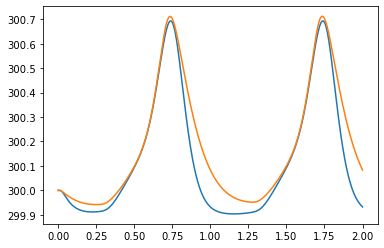

In [72]:
plt.plot(C[2]/86400,C[0][:,20])
plt.plot(D[2]/86400,D[0][:,20])

In [ ]:
cols = matplotlib.cm.jet(np.linspace(0,1,6))
fig, ax = plt.subplots(2,3,figsize=(9,6))
for i in range(len(Akappas)):
    ax[0,0].plot(Akappa[i][2]/86400,Akappa[i][0][:,0]-300,c=cols[i])
    ax[0,1].plot(Amu[i][2]/86400,Amu[i][0][:,0]-300,c=cols[i])
    ax[0,2].plot(Aalpha[i][2]/86400,Aalpha[i][0][:,0]-300,c=cols[i])
    
    noon = int(len(Akappa[i][2])/48)*14
    am2 = int(len(Akappa[i][2])/48)*2
    ax[1,0].plot(Akappa[i][0][noon]+0.5,Akappa[i][1],c=cols[i], label=str(Akappas[i]))
    ax[1,0].plot(Akappa[i][0][am2],Akappa[i][1],c=cols[i])
    
    noon = int(len(Amu[i][2])/48)*14
    am2 = int(len(Amu[i][2])/48)*2
    ax[1,1].plot(Amu[i][0][noon]+0.5,Amu[i][1],c=cols[i], label=str(Amus[i]))
    ax[1,1].plot(Amu[i][0][am2],Amu[i][1],c=cols[i])
    
    noon = int(len(Aalpha[i][2])/48)*14
    am2 = int(len(Aalpha[i][2])/48)*2
    ax[1,2].plot(Aalpha[i][0][noon]+0.5,Aalpha[i][1],c=cols[i], label=str(Aalphas[i]))
    ax[1,2].plot(Aalpha[i][0][am2],Aalpha[i][1],c=cols[i])

ax[1,0].legend(fontsize=8)
ax[1,1].legend(fontsize=8)
ax[1,2].legend(fontsize=8)

titles=[r'Diffusivity $\tilde \kappa$',r'Mixing coeff. $\mu$',r'Attenuation coeff. $\alpha$']
for i in range(3):
    ax[0,i].set(xlabel='Local sun time (h)',xticks=np.arange(0,2.25,0.25),xticklabels=np.arange(0,48+6,6))
    ax[1,i].set(xlabel='Temperature (K)')
    ax[0,i].set_title(titles[i])
ax[0,0].set(ylabel=r'$\Delta$SST (K)')
ax[1,0].set(ylabel='Depth (m)')

fig.tight_layout()

#plt.savefig('../../Masterarbeit/thesis/figs/EXP_sensitivity.pdf',bbox_inches='tight')

In [ ]:
fig, ax = plt.subplots(3,3,dpi=100,figsize=(10,8))
ax[0,0].semilogx(Akappas,Akappamax,'.-', c='dodgerblue')
ax[1,0].semilogx(Akappas,np.array(Akappashift)%24,'.-', c='dodgerblue')
ax[2,0].semilogx(Akappas,Akappaskin,'.-', c='dodgerblue')

ax[0,1].semilogx(Amus,Amumax,'.-', c='dodgerblue')
ax[1,1].semilogx(Amus,np.array(Amushift)%24,'.-', c='dodgerblue')
ax[2,1].semilogx(Amus,Amuskin,'.-', c='dodgerblue')

ax[0,2].plot(Aalphas,Aalphamax,'.-', c='dodgerblue')
ax[1,2].plot(np.array(Aalphas)[np.array(Aalphashift)>0],np.array(Aalphashift)[np.array(Aalphashift)>0]%24,'.-', c='dodgerblue')
ax[2,2].plot(Aalphas,Aalphaskin,'.-', c='dodgerblue')

titles=[r'Diffusivity $\tilde \kappa$',r'Mixing coeff. $\mu$',r'Attenuation coeff. $\alpha$']
xlabels=[r'$\tilde \kappa$ (m$^2$s$^{-1}$)',r'$\mu$ (ms$^{-1}$)',r'$\alpha$ (m$^{-1}$)']
ylabels=[r'$\Delta$SST (K)', 'Phase shift (h)', 'Skin effect (K)']
for i in range(3):
    ax[0,i].set_title(titles[i],fontsize=12)
    ax[2,i].set_xlabel(xlabels[i],fontsize=12)
    ax[i,0].set_ylabel(ylabels[i],fontsize=12)
    ax[0,i].set(ylim=(-0.5,None))
    ax[1,i].set(ylim=(11.,14.5))
    ax[1,i].axhline(y=12,lw=1,ls='--',c='k')
    ax[2,i].set(ylim=(-2.7,0))
    ax[0,i].set(xticklabels=[])
    ax[1,i].set(xticklabels=[])
    ax[i,2].set(xlim=(-0.5,10.5))

fig.tight_layout(h_pad=0.6)

#plt.savefig('../../Masterarbeit/thesis/figs/EXP_sensitivity_stats.pdf',bbox_inches='tight')

In [ ]:
for i in range(6):
    print(Aalphashift)

In [34]:
make_mesh(0.1,40)

(array([  0.1       ,   0.        ,  -0.1       ,  -0.20421554,
         -0.31282433,  -0.42601156,  -0.54397024,  -0.66690152,
         -0.79501502,  -0.92852919,  -1.06767171,  -1.21267983,
         -1.36380083,  -1.52129239,  -1.68542307,  -1.85647274,
         -2.03473308,  -2.22050806,  -2.41411445,  -2.6158824 ,
         -2.82615595,  -3.04529367,  -3.27366922,  -3.51167204,
         -3.75970796,  -4.01819993,  -4.28758874,  -4.56833373,
         -4.86091364,  -5.16582737,  -5.48359486,  -5.81475796,
         -6.15988138,  -6.51955361,  -6.89438796,  -7.2850236 ,
         -7.69212665,  -8.11639128,  -8.55854095,  -9.01932962,
         -9.49954302, -10.        ]),
 1.04215539432737)

In [95]:
np.where(C[2]/86400*24>i)[0][0]

20152